# Data Loading

## Import Library 
Kita akan menuliskan beberapa library yang akan kita butuhkan nanti. Disini saya menggunakan numpy untuk operasi numerik. Pandas untuk mengoperasikan pandas data frame. Seaborn untuk memudahkan dalam visualisasi data. Matplotlib untuk visualisasi data. SVC untuk model machine learning kita yaitu SVM. Google Colab supaya dapat mengoperasikan colab lebih bebas. Accuracy Score untuk metrik evaluasi model dengan akurasi. GaussianNB untuk model machine learning kita yaitu NaivesBaiyes. DecisionTreeClassifier untuk model machine learning kita yaitu DecisionTree. LogisticRegression untuk model machine learning kita yaitu LogisticRegression. train_test_split untuk membagi data kita menjadi train dan test. StandardScaler untuk merubah skala dari data tersebut dan OrdinalEncoder untuk merubah data objek menjadi numerik. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from google.colab import files, output
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

print("Semua library yang dibutuhkan telah terhubung")

Semua library yang dibutuhkan telah terhubung


## Hubungkan Colab ke Kaggle
Kita akan menghubungkan colab dengan kaggle, untuk mendownload datasets yang akan kita butuhkan. Dengan mengimport file kaggle.json yang tersedia di situs kaggle teman masing-masing.

In [ ]:
!rm kaggle.json
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

output.clear()
print("Colab telah terhubung dengan kaggle")

Colab telah terhubung dengan kaggle


## Download dataset
Kita download datasets yang akan kita butuhkan.

In [ ]:
!rm stroke-prediction-dataset.zip
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

output.clear()
print("Datasets telah berhasil didownload")

Datasets telah berhasil didownload


## Extract dataset
Kita proses datasets tersebut supaya bisa digunakan di colab.

In [ ]:
!rm healthcare-dataset-stroke-data.csv
!unzip stroke-prediction-dataset.zip
!rm stroke-prediction-dataset.zip

output.clear()
print("Datasets telah siap digunakan")

Datasets telah siap digunakan


## Buka dataset csv dengan pandas
Kita buka datasets tersebut dan kita tampilkan 5 data teratas.

In [ ]:
df = pd.read_csv("./healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

## Deskripsi Variabel
Setelah itu, kita tampilkan deskripsi variabel pada datasets tersebut. Saya rubah semua nama kolom menjadi kecil supaya memudahkan kita untuk menggunakan kolom tersebut.

In [ ]:
df.columns = [column.lower() for column in df.columns]
print("Total data:", df.shape[0], end="\n\n")
df.info()

Total data: 5110

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Deskripsi Statistik
Setelah itu, kita tampilkan deskripsi statistik pada data tersebut.

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Hapus semua data yang sama
Setelah itu kita hapus data yang sama. Supaya model machine learning kita mempelajari banyak variasi data bukan hanya data yang sama saja.

In [ ]:
print("Total data sebelum hapus duplicates:", df.shape[0])
df = df.drop_duplicates()
print("Total data sebelum hapus duplicates:", df.shape[0])

Total data sebelum hapus duplicates: 5110
Total data sebelum hapus duplicates: 5110


## Menangani Missing Value

### Cek Missing Value
Setelah itu kita cek data yang kosong.

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Masukkan Value ke Missing Value
Kita akan masukkan nilai data kosong tersebut dengan data yang baru menggunakan rata-rata dari kolom tersebut. Kalau semisal nilai null dibiarkan maka akan menyebabkan error dalam proses modeling.

In [ ]:
df[["bmi"]] = df[["bmi"]].fillna(df[["bmi"]].mean())
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Drop kolom id
Drop kolom id, karena biasanya ID itu hanya untuk menunjukkan identitas dari sebuah data dan akan membuat model kita kebingunan.

In [ ]:
print("Before Drop Column: ", df.columns)
df = df.drop(columns=["id"])
print("\nAfter Drop Column: ", df.columns)

Before Drop Column:  Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

After Drop Column:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


## Menangani Outliers Value

### Cek Outliers Value
Kita cek outliers data pada numerical kolom.

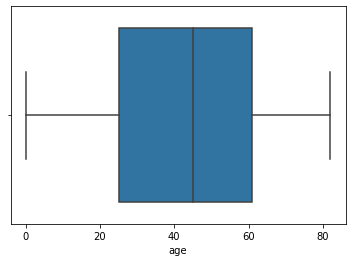

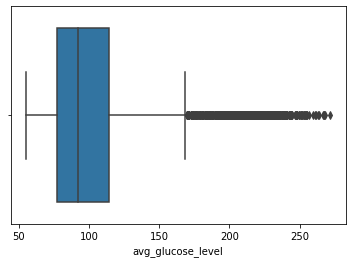

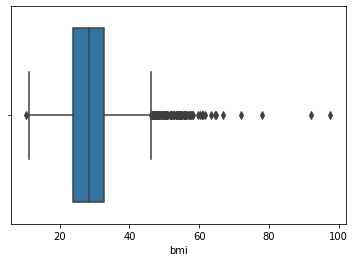

In [ ]:
numerical_columns = ["age", "avg_glucose_level", "bmi"]
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

### Hapus Outliers Value
Hapus outliers data tersebut. Saya menghapus outliers data karena outliers data dapat menganggung performa model kita nanti. Karena data tersebut berbeda dari yang lain.

In [ ]:
print("Total data sebelum dihapus outliers: ", df.shape[0])
for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    df = df.loc[(df[column] > fence_low) & (df[column] < fence_high)]
print("Total data sebelum dihapus outliers: ", df.shape[0])

Total data sebelum dihapus outliers:  5110
Total data sebelum dihapus outliers:  4383


## Univariate Analysis

### Categorical Features
Kita analisa untuk kolom categorical.

        Total data  Persentase
Female        2585        59.0
Male          1797        41.0
Other            1         0.0



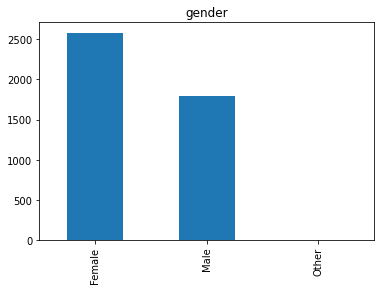

     Total data  Persentase
Yes        2730        62.3
No         1653        37.7



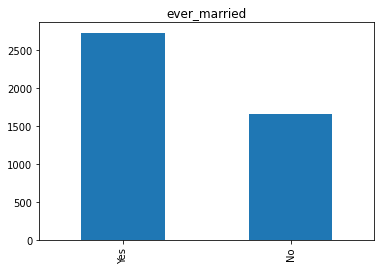

               Total data  Persentase
Private              2476        56.5
children              675        15.4
Self-employed         659        15.0
Govt_job              551        12.6
Never_worked           22         0.5



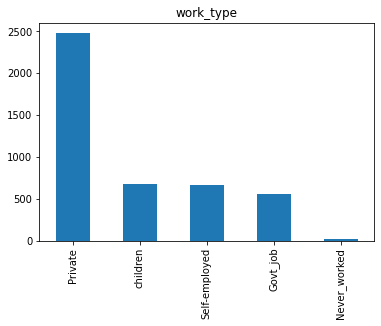

       Total data  Persentase
Urban        2225        50.8
Rural        2158        49.2



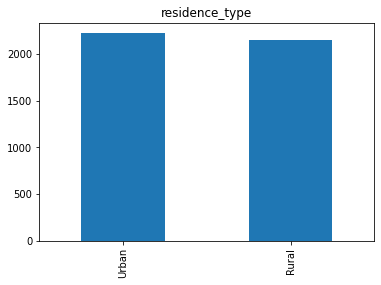

                 Total data  Persentase
never smoked           1592        36.3
Unknown                1417        32.3
formerly smoked         707        16.1
smokes                  667        15.2



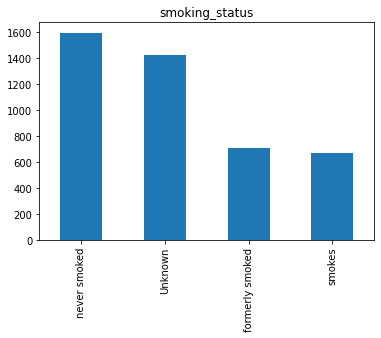

   Total data  Persentase
0        4057        92.6
1         326         7.4



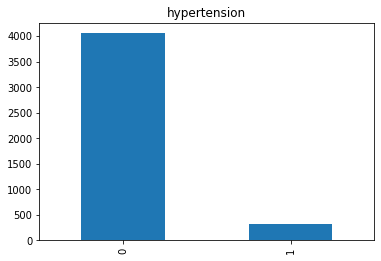

   Total data  Persentase
0        4211        96.1
1         172         3.9



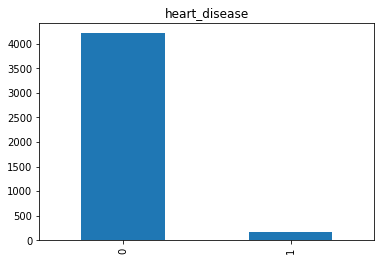

   Total data  Persentase
0        4219        96.3
1         164         3.7



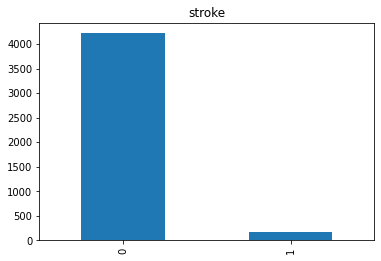

In [ ]:
categorical_column = ["gender", "ever_married", "work_type", 
                      "residence_type", "smoking_status", 
                      "hypertension", "heart_disease", "stroke"]

for column in categorical_column:
    count = df[column].value_counts()
    percent = 100*df[column].value_counts(normalize=True)
    new_df = pd.DataFrame({'Total data':count, 'Persentase':percent.round(1)})
    print(new_df, end="\n\n")
    count.plot(kind='bar', title=column)
    plt.show()

### Numerical Features
Kita analisa untuk kolom numerical.

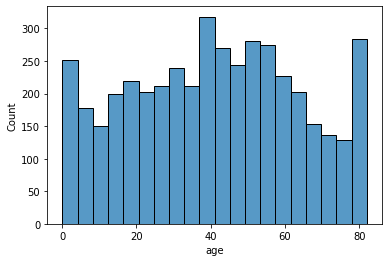

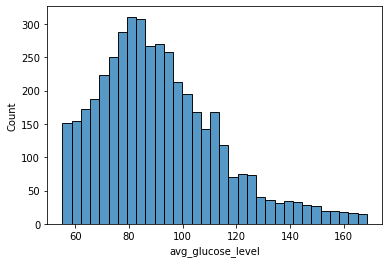

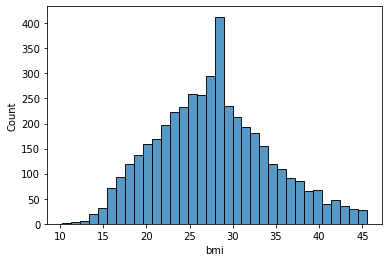

In [ ]:
numerical_columns = ["age", "avg_glucose_level", "bmi"]

for column in numerical_columns:
    sns.histplot(df[column])
    plt.show()

## Multivariate Analysis

### Categorical Features
Kita analisa hubungan antara categorical kolom dengan kolom stroke

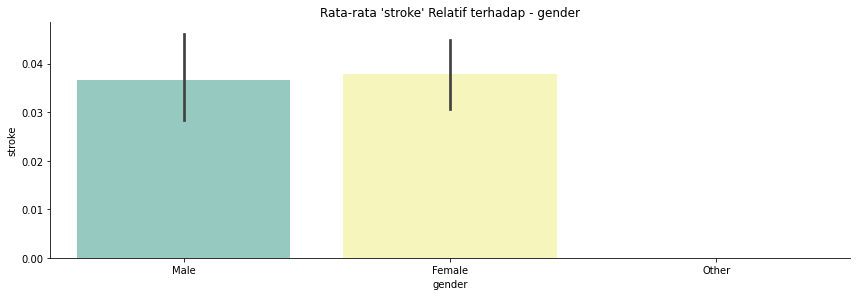

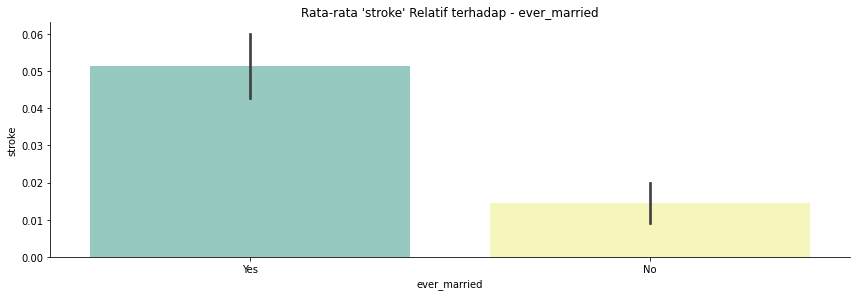

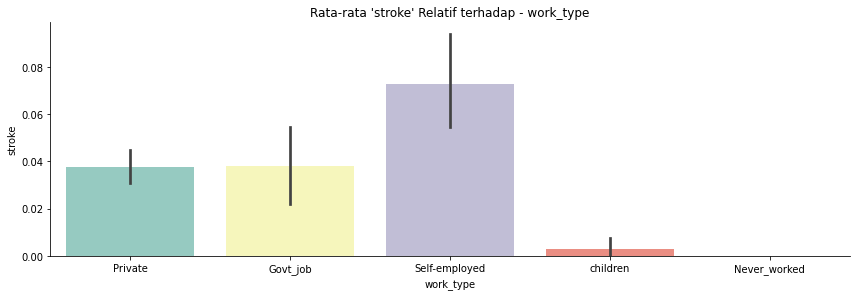

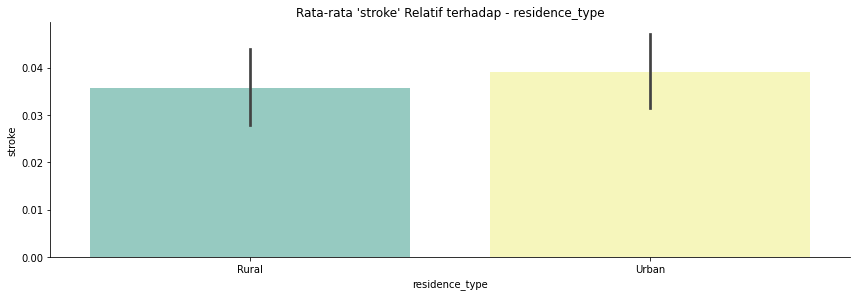

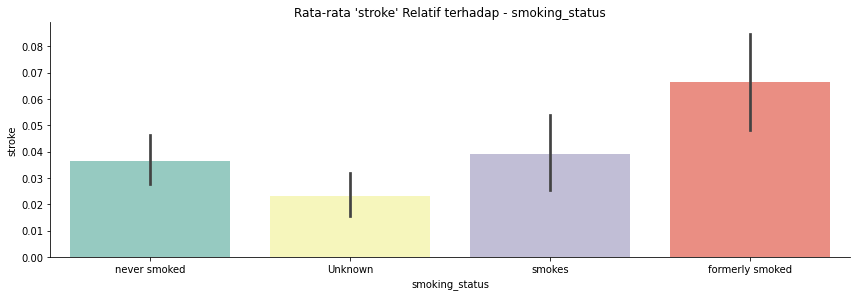

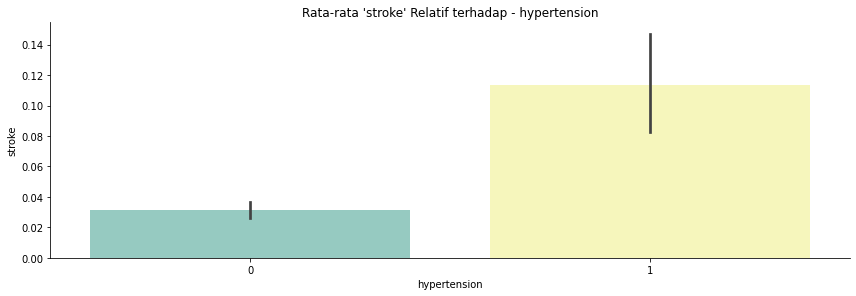

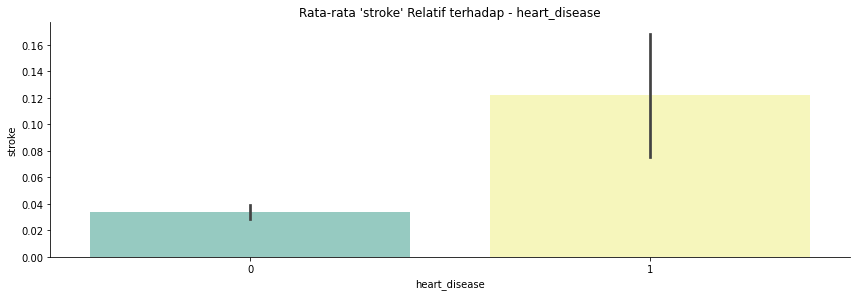

In [ ]:
categorical_column = ["gender", "ever_married", "work_type", 
                      "residence_type", "smoking_status", 
                      "hypertension", "heart_disease"]

for col in categorical_column:
  sns.catplot(x=col, y="stroke", kind="bar", dodge=False, height=4, aspect=3,  
              data=df, palette="Set3")
  plt.title("Rata-rata 'stroke' Relatif terhadap - {}".format(col))
  plt.show()

plt.show()

### Numerical Features
Kita analisa hubungan antara numerical kolom dengan kolom stroke

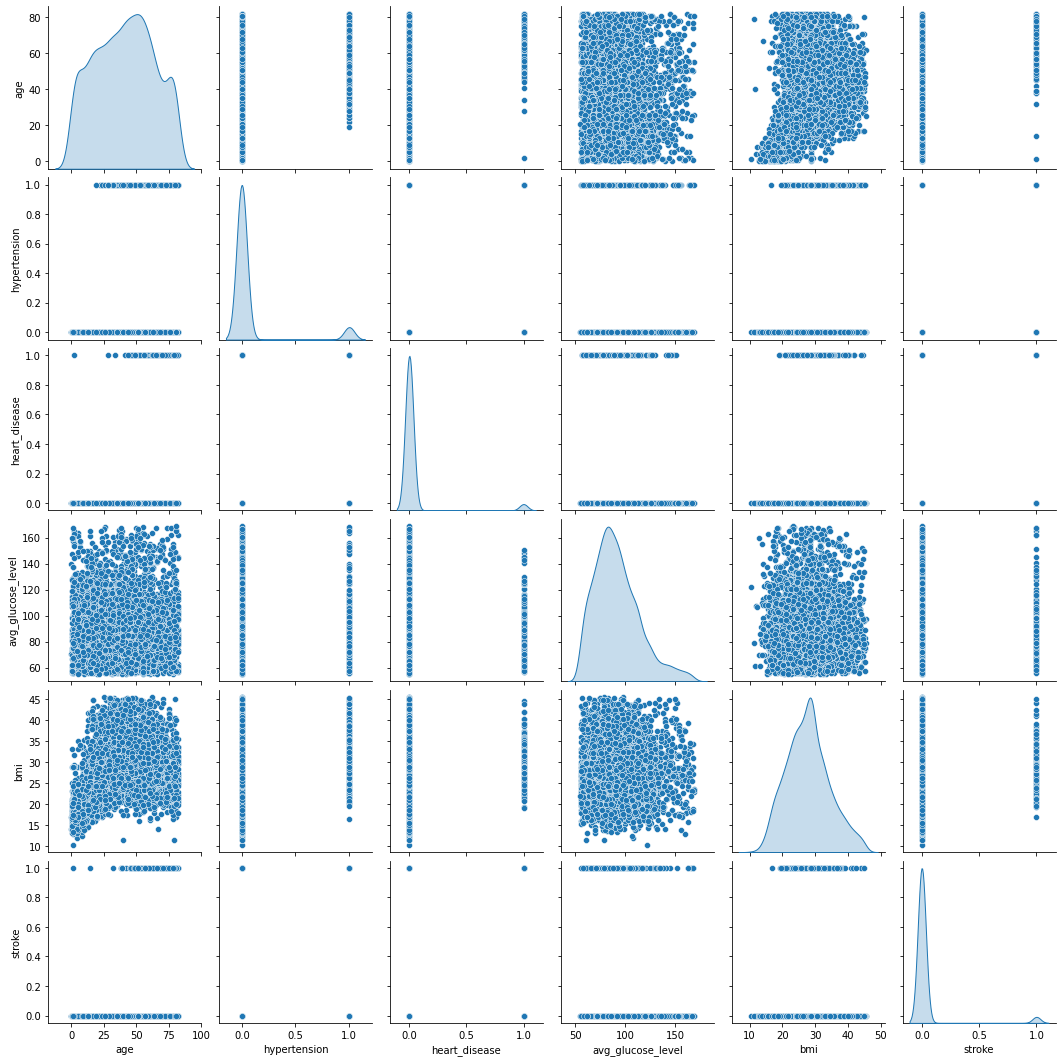

In [ ]:
sns.pairplot(df, diag_kind="kde")
plt.show()

#### Cek Correlation untuk Fitur Numerik
Kita cek korelasi antar kolom numerik.

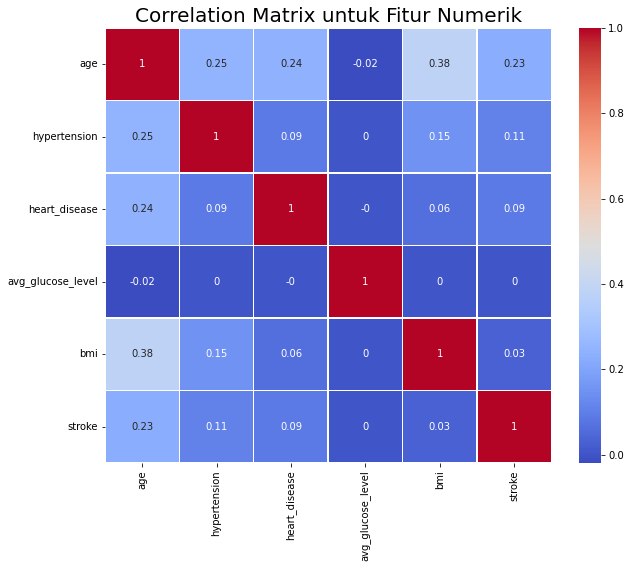

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

#### Drop fitur yang tidak berkorelasi
Drop kolom yang tidak berkorelasi. Karena kalau semisal dibiarkan maka akan memperlambat latih kita soalnya kolom tersebut tidak terlalu dibutuhkan.

In [ ]:
print("Before Drop Column: ", df.columns)
df = df.drop(columns=["avg_glucose_level"])
print("\nAfter Drop Column: ", df.columns)

Before Drop Column:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

After Drop Column:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')


# Data Preparation

## Encoding Fitur Kategori
Kita rubah categorical kolom menjadi numerical kolom. Karena model machine learning hanya menerima numerik sebagai masukkan.

In [ ]:
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']
encoder = OrdinalEncoder()
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])
df = df.astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 2 to 5109
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4383 non-null   float64
 1   age             4383 non-null   float64
 2   hypertension    4383 non-null   float64
 3   heart_disease   4383 non-null   float64
 4   ever_married    4383 non-null   float64
 5   work_type       4383 non-null   float64
 6   residence_type  4383 non-null   float64
 7   bmi             4383 non-null   float64
 8   smoking_status  4383 non-null   float64
 9   stroke          4383 non-null   float64
dtypes: float64(10)
memory usage: 536.7 KB


## Standarisasi Value
Kita standarisasi data tersebut dengan menggunakan StandardScaler. Supaya perbandingan jarak antar kolom satu dengan yang lain tidaklah jauh.

In [ ]:
all_columns = df.columns[:-1]
scaler = StandardScaler()
df[all_columns] = scaler.fit_transform(df[all_columns])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,bmi,smoking_status,stroke
2,1.197351,1.733246,-0.283469,4.947985,0.778135,-0.181806,-1.015405,0.725385,0.604481,1.0
6,1.197351,1.467317,3.527717,4.947985,0.778135,-0.181806,-1.015405,-0.056744,0.604481,1.0
7,-0.833605,1.245710,-0.283469,-0.202102,-1.285124,-0.181806,0.984829,-0.762194,0.604481,1.0
8,-0.833605,0.802495,-0.283469,-0.202102,0.778135,-0.181806,-1.015405,0.172257,-1.239249,1.0
9,-0.833605,1.644603,-0.283469,-0.202102,0.778135,-0.181806,0.984829,-0.547492,-1.239249,1.0


## Train-Test-Split
Pisahkan data menjadi data train dan data test. Supaya model machine learning kita dapat mempelajari data baru yaitu tes, bukan hanya berkutat pada data latih.

In [ ]:
x = df.drop(columns=["stroke"])
y = df["stroke"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=69)
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 4383
Total # of sample in train dataset: 3506
Total # of sample in test dataset: 877


# Model Development

## Buat Model
Kita buat model nya, disini saya membuat 5 model yaitu SVM, NaivesBaiyes, DecisionTree, LogisticRegression, RandomForest

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)

nb = GaussianNB()
nb.fit(x_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

lr = LogisticRegression()
lr.fit(x_train, y_train)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

print("Semua model berhasil dibuat")

Semua model berhasil dibuat


## Evaluasi Model

### Akurasi Model
Kita evaluasi akurasi model tersebut.


In [ ]:
evaluation = pd.DataFrame(columns=['train', 'test'], index=["SVM","Naive Baiyes",
                                                            "Decision Tree", 
                                                            "Logistic Regression", 
                                                            "Random Forest"])
model_dict = {
    "SVM": svm,
    "Naive Baiyes": nb,
    "Decision Tree": dt,
    "Logistic Regression": lr,
    "Random Forest": rf
}
for name, model in model_dict.items():
    evaluation.loc[name, 'train'] = accuracy_score(y_true=y_train, 
                                                   y_pred=model.predict(x_train))
    evaluation.loc[name, 'test'] = accuracy_score(y_true=y_test, 
                                                  y_pred=model.predict(x_test))
 
evaluation

,train,test
SVM,0.96235,0.963512
Naive Baiyes,0.893896,0.887115
Decision Tree,0.99943,0.936146
Logistic Regression,0.96235,0.963512
Random Forest,0.99943,0.960091


### Plot Evaluasi
Kita plot hasil dari model tersebut

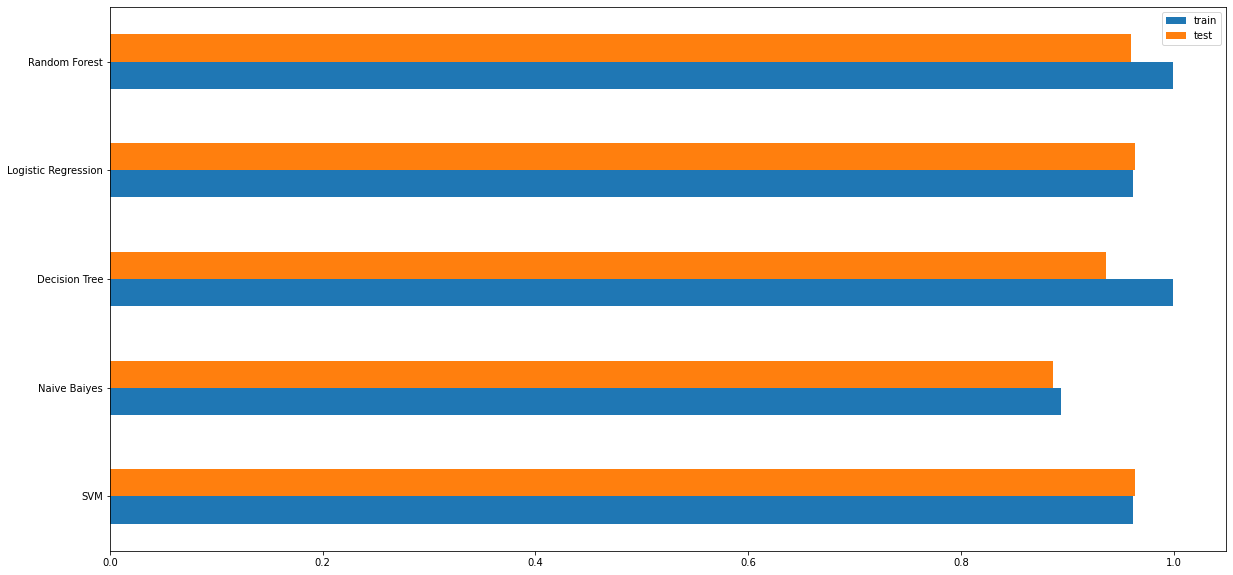

In [ ]:
evaluation.plot(kind='barh', figsize=(20, 10))
plt.show()

### Bandingkan Model
Kita bandingkan hasil prediksi setiap model.

In [ ]:
prediksi = x_test.iloc[:3].copy()
pred_dict = {'y_true':y_test[:3]}
for name, model in model_dict.items():
    pred_dict['Prediksi '+name] = model.predict(prediksi).round(1)
    
pd.DataFrame(pred_dict)

,y_true,Prediksi SVM,Prediksi Naive Baiyes,Prediksi Decision Tree,Prediksi Logistic Regression,Prediksi Random Forest
3902,0.0,0.0,0.0,0.0,0.0,0.0
2487,0.0,0.0,0.0,0.0,0.0,0.0
3491,0.0,0.0,0.0,0.0,0.0,0.0
